In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

seed_ = 20200218
tf.random.set_seed(seed_)
np.random.seed(seed_)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import json

In [2]:
df = pd.read_csv("./data/Sarcasm_CSV.csv")
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


# Conv Layer

## `tf.keras.layers.Conv1D(filters, kernel_size)`

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

- kernel_size = การ group word

In [3]:
# config

num_words = 10000
embedding_dims = 32
max_length = 32
pad_trunc = 'post'
pad_type = 'pre'
oov_token = '<OOV>'

training_size = 20000
num_epochs = 30

In [4]:
df_train = df.iloc[:training_size]
df_test = df.iloc[training_size:]

In [5]:
# tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words, 
                                                  oov_token=oov_token)

In [6]:
tokenizer.fit_on_texts(df_train['headline'])
word_index = tokenizer.word_index

for k in list(word_index.keys())[:10]:
    print(f"{k}:\t{word_index[k]}")

<OOV>:	1
to:	2
of:	3
the:	4
in:	5
for:	6
a:	7
on:	8
and:	9
with:	10


In [7]:
train_sequences = tokenizer.texts_to_sequences(df_train['headline'])
test_sequences = tokenizer.texts_to_sequences(df_test['headline'])

In [8]:
padded_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_sequences, maxlen=max_length, padding=pad_type, truncating=pad_trunc
)

padded_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=max_length, padding=pad_type, truncating=pad_trunc
)

# Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dims),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
optimizer = tf.keras.optimizers.Adam()

In [11]:
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='binary_crossentropy')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         20608     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 342,689
Trainable params: 342,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(padded_train, 
          df_train['is_sarcastic'], 
          batch_size=64, epochs=num_epochs, 
          validation_data=(padded_test, df_test['is_sarcastic']))

Epoch 1/30
313/313 [==============================] - 4s 13ms/step - loss: 0.4663 - accuracy: 0.7656 - val_loss: 0.3394 - val_accuracy: 0.8498
Epoch 2/30
313/313 [==============================] - 4s 12ms/step - loss: 0.2550 - accuracy: 0.8950 - val_loss: 0.3527 - val_accuracy: 0.8491
Epoch 3/30
313/313 [==============================] - 4s 11ms/step - loss: 0.1863 - accuracy: 0.9284 - val_loss: 0.4091 - val_accuracy: 0.8330
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 0.1421 - accuracy: 0.9491 - val_loss: 0.4600 - val_accuracy: 0.8308
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: 0.1145 - accuracy: 0.9599 - val_loss: 0.5019 - val_accuracy: 0.8277
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.0892 - accuracy: 0.9693 - val_loss: 0.5813 - val_accuracy: 0.8264
Epoch 7/30
313/313 [==============================] - 4s 13ms/step - loss: 0.0694 - accuracy: 0.9789 - val_loss: 0.6661 - val_accuracy: 0.8229

c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


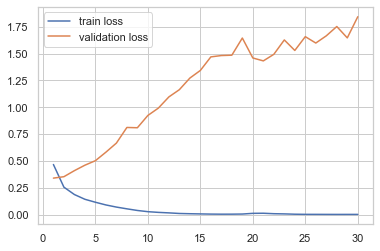

In [14]:
epochs = np.arange(1, num_epochs+1)

sns.lineplot(epochs, hist.history['loss'], label='train loss')
sns.lineplot(epochs, hist.history['val_loss'], label='validation loss')
plt.show()

c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\chuan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


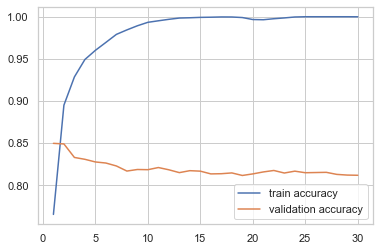

In [15]:
sns.lineplot(epochs, hist.history['accuracy'], label='train accuracy')
sns.lineplot(epochs, hist.history['val_accuracy'], label='validation accuracy')
plt.show()